## 1.1 Explorando y entendiendo la información
La idea en las siguientes secciones, es obtener ciertas funciones en Python que nos ayudarán a entender la información así como lo hicimos con R. Encontraremos comando análogos en búsqueda del análisis descriptivo de los datos.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [27]:
uc = pd.read_csv("/content/usedcars.csv")

In [4]:
uc.tail() 

,year,model,price,mileage,color,transmission
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO
149,2000,SE,3800,109259,Red,AUTO


## 1.2 Estructura de los datos

In [5]:
uc.info() # análogo a la función str() en R

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


## 1.3 Explorando variables numéricas

In [6]:
uc.columns 

Index(['year', 'model', 'price', 'mileage', 'color', 'transmission'], dtype='object')

In [8]:
type(uc) 

pandas.core.frame.DataFrame

In [9]:
uc[["price","mileage"]].describe() # análogo a la función summary() en R

,price,mileage
count,150.000000,150.000000
mean,12961.933333,44260.646667
std,3122.481735,26982.104322
min,3800.000000,4867.000000
25%,10995.000000,27200.250000
50%,13591.500000,36385.000000
75%,14904.500000,55124.500000
max,21992.000000,151479.000000


### 1.3.1 Media y Mediana en Python

In [12]:
np.mean(uc["price"])

12961.933333333332

In [13]:
uc["price"].mean()

12961.933333333332

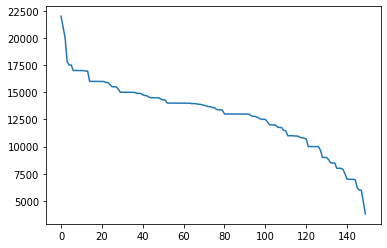

In [15]:
uc["price"].plot()

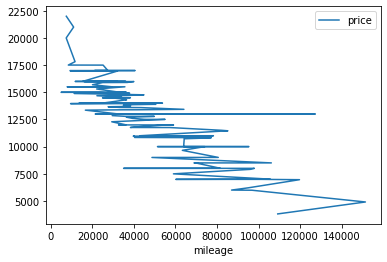

In [18]:
uc.plot(x="mileage",y="price")

In [19]:
np.median(uc["price"])

13591.5

In [20]:
uc["mileage"].mean()

44260.64666666667

In [21]:
uc["mileage"].median()

36385.0

### 1.3.2 Medición de la dispersión: cuartiles y resumen de cinco números

In [22]:
rango = [min(uc["mileage"]),max(uc["mileage"])]

In [23]:
rango = pd.DataFrame(rango)

In [24]:
rango.diff().iloc[1]

0    146612.0
Name: 1, dtype: float64

In [25]:
IQR = stats.iqr(uc["price"])

In [26]:
IQR

3909.5

El equivalente en Python a la función *quantile()* en R, es el método o atributo



```
dataframe.quantile()
```



In [ ]:
uc["price"].quantile(np.arange(0,1.25,0.25))

0.00     3800.0
0.25    10995.0
0.50    13591.5
0.75    14904.5
1.00    21992.0
Name: price, dtype: float64

## 1.3.4 Visualización de variables numéricas - diagramas de cajas y bigotes

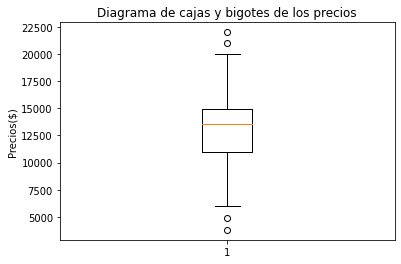

In [28]:
plt.boxplot(uc["price"])
plt.title("Diagrama de cajas y bigotes de los precios")
plt.ylabel("Precios($)")
plt.show()

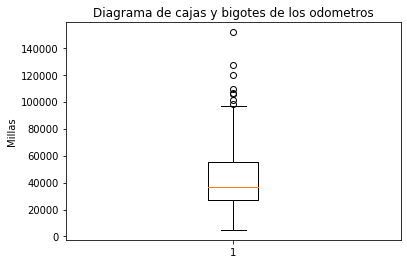

In [29]:
plt.boxplot(uc["mileage"])
plt.title("Diagrama de cajas y bigotes de los odometros")
plt.ylabel("Millas")
plt.show()

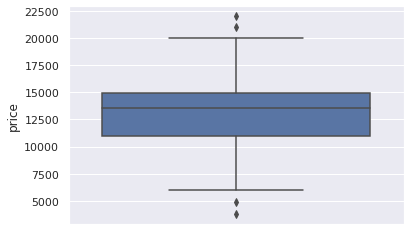

In [30]:
import seaborn as sns
sns.set_theme(style="darkgrid") #estilos que usa Seaborn
ax = sns.boxplot(y="price", data=uc)

###1.3.5 Visualizando variables numéricas - histogramas

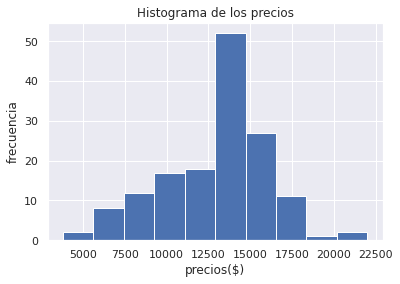

In [33]:
plt.hist(uc["price"])
plt.title("Histograma de los precios")
plt.ylabel("frecuencia")
plt.xlabel("precios($)")
plt.show()

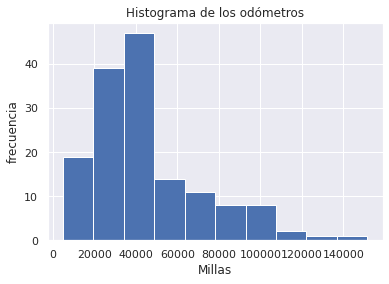

In [34]:
plt.hist(uc["mileage"])
plt.title("Histograma de los odómetros")
plt.ylabel("frecuencia")
plt.xlabel("Millas")
plt.show()

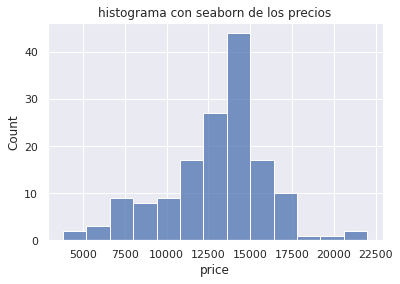

In [35]:
sns.histplot(data=uc, x="price").set(title="histograma con seaborn de los precios")
plt.show()

Densidad

In [36]:
from scipy.stats import gaussian_kde

In [39]:
densidad_precios =  gaussian_kde(uc["mileage"])
x = np.arange(min(uc["mileage"]),max(uc["mileage"]),1)

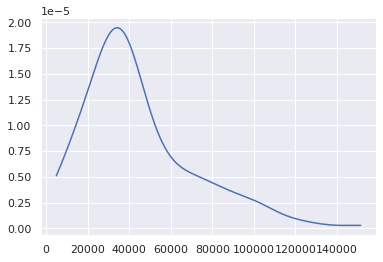

In [41]:
plt.plot(x,densidad_precios(x))
plt.show()

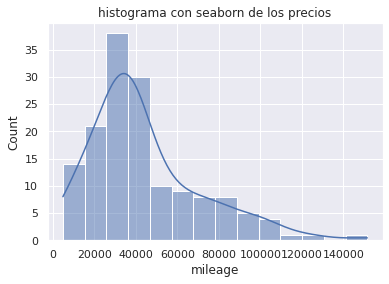

In [42]:
sns.histplot(data=uc, x="mileage",kde=True).set(title="histograma con seaborn de los precios")
plt.show()

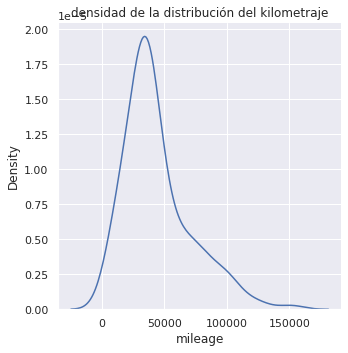

In [43]:
sns.displot(uc,x="mileage",kind="kde").set(title="densidad de la distribución del kilometraje")
plt.show()

### 1.3.6 Distribuciones uniforme y normal

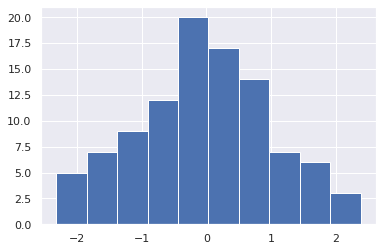

In [44]:
x = np.random.standard_normal(100)
plt.hist(x)
plt.show()

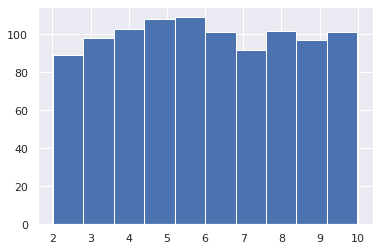

In [45]:
y = np.random.uniform(2,10,1000)
plt.hist(y)
plt.show()

### 1.3.7 Medida de dispersión de datos numéricos - varianza y desviación estándar

In [46]:
np.var(uc['price'])

9684892.902222227

In [48]:
np.std(uc['price'])

3112.056057050102

In [49]:
np.sum((uc['price']-np.mean(uc['price']))**2)/(len(uc['price'])-1)

9749892.183445191

In [51]:
uc["price"].var()

9749892.183445197

### Prueba de normalidad usando el test de KS(# datos >50) y Shapiro (# datos<=50)
Estas pruebas consisten en verificar o contrastar la hipótesis nula de que la información que está siendo probada, proviene de una distribución normal.

In [52]:
prueba_normalidad = stats.kstest(uc["price"],"norm")

In [53]:
prueba_normalidad

KstestResult(statistic=1.0, pvalue=0.0)

## 1.4 Exploración de variables categóricas

In [54]:
from collections import Counter # Extraemos una función parecida al comando table() en R
Counter(uc['year'])

Counter({2000: 3,
         2001: 1,
         2002: 1,
         2003: 1,
         2004: 3,
         2005: 2,
         2006: 6,
         2007: 11,
         2008: 14,
         2009: 42,
         2010: 49,
         2011: 16,
         2012: 1})

In [56]:
uc["year"].value_counts().index

Int64Index([2010, 2009, 2011, 2008, 2007, 2006, 2004, 2000, 2005, 2012, 2003,
            2002, 2001],
           dtype='int64')

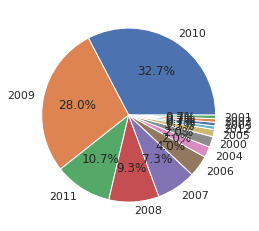

In [63]:
plt.pie(uc["year"].value_counts(),labels = uc["year"].value_counts().index,explode=(0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%1.1f%%')
plt.show()

### 1.4.1 Midiendo la tendencia central - La moda

In [64]:
uc.columns.values

array(['year', 'model', 'price', 'mileage', 'color', 'transmission'],
      dtype=object)

In [65]:
stats.mode(uc["transmission"])

ModeResult(mode=array(['AUTO'], dtype=object), count=array([128]))

### 1.5.1 Visualizando las relaciones - diagramas de dispersión

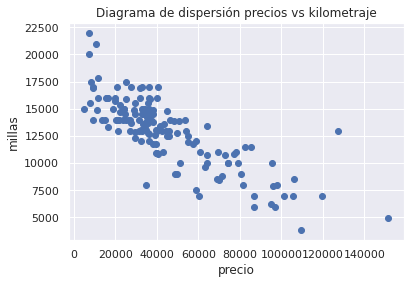

In [66]:
plt.scatter(uc["mileage"],uc["price"])
plt.title("Diagrama de dispersión precios vs kilometraje")
plt.xlabel("precio")
plt.ylabel("millas")
plt.show()

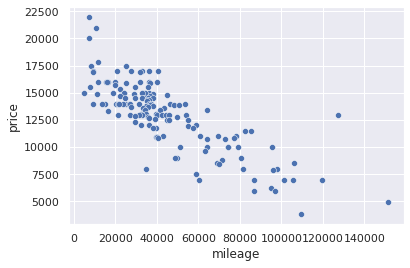

In [67]:
sns.scatterplot(data=uc, x="mileage", y="price")
plt.show()